# Assigment 2 Introduction to Python For Data Science

- Name : Ahmad Firdaus Zulva
- Code Class : PYTN-KS04-001


## Overview About Projects

**Proyek Assigment Ke-2** dalam course **Introduction to Python For Data Science**. Assigment ini berisi hasil olah data dari NYC Sales Property. Dataset ini adalah catatan dari setiap bangunan atau unit bangunan (apartemen, dll) yang dijual di pasar properti New York City selama periode 12 bulan. Dataset ini berisi :


- this dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

    1. BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
    2. BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
    3. BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time. See the glossary linked to below.

## Import Dataset and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scistats
import statsmodels.api as sm
%matplotlib inline

In [2]:
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN']
df=pd.read_csv('nyc-rolling-sales.csv',na_values=missing_values)

In [3]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


## Preprocessing Data

In [4]:
# Mencari dimensi data
df.shape

(84548, 22)

In [5]:
# Mencari kolom pada data
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [6]:
# Mencari nulls pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [7]:
# mencari nilai unique pada data
for i in df.columns:
    print("Nilai Unique Pada ",i)
    print("---"*25)
    print(df[i].unique())
    print("---"*25)

Nilai Unique Pada  Unnamed: 0
---------------------------------------------------------------------------
[    4     5     6 ... 26737 26738 26739]
---------------------------------------------------------------------------
Nilai Unique Pada  BOROUGH
---------------------------------------------------------------------------
[1 2 3 4 5]
---------------------------------------------------------------------------
Nilai Unique Pada  NEIGHBORHOOD
---------------------------------------------------------------------------
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE

['6625000' ' -  ' '3936272' ... '408092' '11693337' '69300']
---------------------------------------------------------------------------
Nilai Unique Pada  SALE DATE
---------------------------------------------------------------------------
['2017-07-19 00:00:00' '2016-12-14 00:00:00' '2016-12-09 00:00:00'
 '2016-09-23 00:00:00' '2016-11-17 00:00:00' '2017-07-20 00:00:00'
 '2017-06-20 00:00:00' '2016-11-07 00:00:00' '2016-10-17 00:00:00'
 '2016-09-06 00:00:00' '2017-03-10 00:00:00' '2017-04-28 00:00:00'
 '2017-06-09 00:00:00' '2017-07-14 00:00:00' '2017-03-16 00:00:00'
 '2016-09-01 00:00:00' '2017-08-17 00:00:00' '2016-09-07 00:00:00'
 '2017-08-30 00:00:00' '2017-06-21 00:00:00' '2017-01-30 00:00:00'
 '2017-07-07 00:00:00' '2017-08-04 00:00:00' '2017-01-09 00:00:00'
 '2017-04-18 00:00:00' '2017-06-19 00:00:00' '2017-08-28 00:00:00'
 '2017-05-10 00:00:00' '2016-12-02 00:00:00' '2017-01-31 00:00:00'
 '2017-06-28 00:00:00' '2016-12-07 00:00:00' '2017-08-24 00:00:00'
 '2017-06-27 00:00:00

Dari Pencarian nilai unique kita dapat mengetahui beberapa hal yang penting, yakni terdapat nilai yang diindikasi sebagai missing value. Beberapa yang diduga missing value sebagai berikut :
- Terdapat beberapa kolom yang mengandung nilai missing value (' ') sehingga akan direplace menjadi np.nan
- Terdapat beberapa kolom yang mengandung nilai missing value (0) sehingga akan direplace menjadi np.nan
- Kolom Unnamed: 0 tidak diperlukan untuk analisis, sehingga akan dihilangkan.
- Kolom Ease-Ment tidak mengandung data informasi apapun sehingga akan dihilangkan.


In [8]:
missing_values = [ 'na','n/a', "--", ' -  ',"NA", 'n-a', 'NaN',' ', "?"]
df_nyc=pd.read_csv('nyc-rolling-sales.csv', na_values=missing_values)

In [9]:
df_nyc['TOTAL UNITS']=df_nyc['TOTAL UNITS'].replace({0:np.nan})
df_nyc['ZIP CODE']=df_nyc['ZIP CODE'].replace({0:np.nan})
df_nyc['YEAR BUILT']=df_nyc['YEAR BUILT'].replace({0:np.nan})

In [10]:
df_nyc

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5.0,1633.0,6440.0,1900.0,2,C2,6625000.0,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31.0,4616.0,18690.0,1900.0,2,C7,NaN,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17.0,2212.0,7803.0,1900.0,2,C7,NaN,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10.0,2272.0,6794.0,1913.0,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6.0,2369.0,4615.0,1900.0,2,C2,8000000.0,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,NaN,B9,37 QUAIL LANE,...,2,0,2.0,2400.0,2575.0,1998.0,1,B9,450000.0,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,NaN,B9,32 PHEASANT LANE,...,2,0,2.0,2498.0,2377.0,1998.0,1,B9,550000.0,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,NaN,B2,49 PITNEY AVENUE,...,2,0,2.0,4000.0,1496.0,1925.0,1,B2,460000.0,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,NaN,K6,2730 ARTHUR KILL ROAD,...,0,7,7.0,208033.0,64117.0,2001.0,4,K6,11693337.0,2016-12-21 00:00:00


In [11]:
## kita akan membuang kolom yang tidak diperlukan dalam analisis
hapus_kolom=['Unnamed: 0','ADDRESS', 'EASE-MENT','APARTMENT NUMBER']
df_nyc.drop(hapus_kolom,inplace=True, axis=1)

In [12]:
df_nyc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009.0,5,0,5.0,1633.0,6440.0,1900.0,2,C2,6625000.0,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,10009.0,28,3,31.0,4616.0,18690.0,1900.0,2,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,10009.0,16,1,17.0,2212.0,7803.0,1900.0,2,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009.0,10,0,10.0,2272.0,6794.0,1913.0,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009.0,6,0,6.0,2369.0,4615.0,1900.0,2,C2,8000000.0,2016-11-17 00:00:00


In [13]:
# handling missing values
df_nyc.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ZIP CODE                            982
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       19762
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

Dari hasil yang ditampilkan terdapat beberapa kolom yang terdapat nilainya dianggap nulls. kita akan mencoba untuk menghilangkan nilai nulls tersebut.

In [14]:
#mengubah missing values pada kolom tertentu dengan nilai modus pada kolom tsb
columns1 = ['TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ZIP CODE', 'YEAR BUILT']
for cat_col in columns1:
    df_nyc[cat_col].fillna(df_nyc[cat_col].mode()[0],inplace=True)
    


In [15]:
columns2 = ['LAND SQUARE FEET', 'GROSS SQUARE FEET']
for float_col in columns2:
    df_nyc[columns2].fillna(df_nyc[columns2].median(),inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [16]:
df_nyc

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009.0,5,0,5.0,1633.0,6440.0,1900.0,2,C2,6625000.0,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,10009.0,28,3,31.0,4616.0,18690.0,1900.0,2,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,10009.0,16,1,17.0,2212.0,7803.0,1900.0,2,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009.0,10,0,10.0,2272.0,6794.0,1913.0,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009.0,6,0,6.0,2369.0,4615.0,1900.0,2,C2,8000000.0,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,10309.0,2,0,2.0,2400.0,2575.0,1998.0,1,B9,450000.0,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,10309.0,2,0,2.0,2498.0,2377.0,1998.0,1,B9,550000.0,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,10309.0,2,0,2.0,4000.0,1496.0,1925.0,1,B2,460000.0,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,10309.0,0,7,7.0,208033.0,64117.0,2001.0,4,K6,11693337.0,2016-12-21 00:00:00


In [17]:
# menghapus sisa nilai NA yang ada pada kolom data
df_nyc.dropna(inplace=True)

In [18]:
df_nyc

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009.0,5,0,5.0,1633.0,6440.0,1900.0,2,C2,6625000.0,2017-07-19 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009.0,10,0,10.0,2272.0,6794.0,1913.0,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009.0,6,0,6.0,2369.0,4615.0,1900.0,2,C2,8000000.0,2016-11-17 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009.0,8,0,8.0,1750.0,4226.0,1920.0,2,C4,3192840.0,2016-09-23 00:00:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,10009.0,24,0,24.0,4489.0,18523.0,1920.0,2,D9,16232000.0,2016-11-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,10309.0,2,0,2.0,2400.0,2575.0,1998.0,1,B9,450000.0,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,10309.0,2,0,2.0,2498.0,2377.0,1998.0,1,B9,550000.0,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,10309.0,2,0,2.0,4000.0,1496.0,1925.0,1,B2,460000.0,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,10309.0,0,7,7.0,208033.0,64117.0,2001.0,4,K6,11693337.0,2016-12-21 00:00:00


In [19]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43063 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         43063 non-null  int64  
 1   NEIGHBORHOOD                    43063 non-null  object 
 2   BUILDING CLASS CATEGORY         43063 non-null  object 
 3   TAX CLASS AT PRESENT            43063 non-null  object 
 4   BLOCK                           43063 non-null  int64  
 5   LOT                             43063 non-null  int64  
 6   BUILDING CLASS AT PRESENT       43063 non-null  object 
 7   ZIP CODE                        43063 non-null  float64
 8   RESIDENTIAL UNITS               43063 non-null  int64  
 9   COMMERCIAL UNITS                43063 non-null  int64  
 10  TOTAL UNITS                     43063 non-null  float64
 11  LAND SQUARE FEET                43063 non-null  float64
 12  GROSS SQUARE FEET               

In [20]:
# Selanjutnya kita akan mengecek data ganda pada dataset, apabila ditemukan data ganda maka kita akan hilangkan datanya
data_ganda = df_nyc.duplicated()
print(data_ganda.sum())

344


Terlihat ada 344 data yang ganda sehingga kita akan hapus 344 data tersebut

In [21]:
df_nyc.drop_duplicates(subset=df_nyc.columns,keep='first', inplace=True)

In [22]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42719 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         42719 non-null  int64  
 1   NEIGHBORHOOD                    42719 non-null  object 
 2   BUILDING CLASS CATEGORY         42719 non-null  object 
 3   TAX CLASS AT PRESENT            42719 non-null  object 
 4   BLOCK                           42719 non-null  int64  
 5   LOT                             42719 non-null  int64  
 6   BUILDING CLASS AT PRESENT       42719 non-null  object 
 7   ZIP CODE                        42719 non-null  float64
 8   RESIDENTIAL UNITS               42719 non-null  int64  
 9   COMMERCIAL UNITS                42719 non-null  int64  
 10  TOTAL UNITS                     42719 non-null  float64
 11  LAND SQUARE FEET                42719 non-null  float64
 12  GROSS SQUARE FEET               

Setelah menghapus missing values dan data yang ganda. Kita akan mengubah isi data menjadi lebih baik. Kita akan mengganti isi dari kolom Borough yang isinya angka menjadi daerah yang ada pada deskripsi. Kita juga akan mengubah tipe data beberapa kolom. 

In [23]:
kolom_float = ['LAND SQUARE FEET','SALE PRICE',  'GROSS SQUARE FEET']
kolom_string = ['NEIGHBORHOOD','BOROUGH',  'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS CATEGORY',  
                'ZIP CODE', 'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE','TAX CLASS AT PRESENT',
                'BUILDING CLASS AT PRESENT']
kolom_integer = ['BLOCK', 'LOT']

# ubah kolom jadi float
for i in kolom_float:
    df_nyc[i] = df_nyc[i].astype('float64')
# ubah kolom jadi string
for i in kolom_string:
    df_nyc[i] = df_nyc[i].astype('str')
# ubah kolom jadi integer
for i in kolom_integer:
    df_nyc[i] = df_nyc[i].astype('int64')

In [24]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42719 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         42719 non-null  object 
 1   NEIGHBORHOOD                    42719 non-null  object 
 2   BUILDING CLASS CATEGORY         42719 non-null  object 
 3   TAX CLASS AT PRESENT            42719 non-null  object 
 4   BLOCK                           42719 non-null  int64  
 5   LOT                             42719 non-null  int64  
 6   BUILDING CLASS AT PRESENT       42719 non-null  object 
 7   ZIP CODE                        42719 non-null  object 
 8   RESIDENTIAL UNITS               42719 non-null  int64  
 9   COMMERCIAL UNITS                42719 non-null  int64  
 10  TOTAL UNITS                     42719 non-null  float64
 11  LAND SQUARE FEET                42719 non-null  float64
 12  GROSS SQUARE FEET               

Karena pada kolom borough nilainya hanya berupa angka 1-5 yang merepresentasikan daerahnya, agar lebih mudah dipahami maka kita akan ubah sesuai dengan daerah tanpa menggunakan angka 1-5

In [25]:
df_nyc['BOROUGH'].replace({'1':'MANHATTAN','2':'BRONX','3':'BROOKLYN','4':'QUEENS','5':'STATEN ISLAND'},inplace=True)

In [26]:
df_nyc.index = range(0,len(df_nyc))

In [27]:
df_nyc['SALE DATE'] = pd.to_datetime(df_nyc['SALE DATE'])
df_nyc['SALE YEAR'] = df_nyc['SALE DATE'].dt.year
df_nyc['SALE MONTH'] = df_nyc['SALE DATE'].dt.month_name()
df_nyc['SALE DATE dt'] = df_nyc['SALE DATE'].dt.day
df_nyc['SALE DAY'] = df_nyc['SALE DATE'].dt.day_name()
df_nyc.drop('SALE DATE',inplace=True, axis=1)
# rename kolom SALE DATE dt menjadi SALE DATE
df_nyc.rename(columns={'SALE DATE dt':'SALE DATE'},inplace=True)

In [28]:
df_nyc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
0,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009.0,5,0,...,1633.0,6440.0,1900.0,2,C2,6625000.0,2017,July,19,Wednesday
1,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009.0,10,0,...,2272.0,6794.0,1913.0,2,C4,3936272.0,2016,September,23,Friday
2,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009.0,6,0,...,2369.0,4615.0,1900.0,2,C2,8000000.0,2016,November,17,Thursday
3,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009.0,8,0,...,1750.0,4226.0,1920.0,2,C4,3192840.0,2016,September,23,Friday
4,MANHATTAN,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,10009.0,24,0,...,4489.0,18523.0,1920.0,2,D9,16232000.0,2016,November,7,Monday


In [29]:
df_nyc.describe ()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,SALE YEAR,SALE DATE
count,42719.000000,42719.000000,42719.000000,42719.000000,42719.000000,4.271900e+04,4.271900e+04,4.271900e+04,42719.000000,42719.000000
mean,5044.473677,240.160748,2.804232,0.265854,3.091341,3.413793e+03,3.887222e+03,1.228430e+06,2016.642665,16.491467
std,3516.638944,502.943106,17.379153,11.483559,20.957253,2.864852e+04,3.052189e+04,1.410363e+07,0.479220,8.820543
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,2016.000000,1.000000
25%,2182.000000,22.000000,1.000000,0.000000,1.000000,1.760000e+03,1.190000e+03,1.080000e+05,2016.000000,9.000000
50%,4628.000000,46.000000,1.000000,0.000000,2.000000,2.300000e+03,1.785000e+03,5.100000e+05,2017.000000,17.000000
75%,7093.500000,95.000000,2.000000,0.000000,2.000000,3.267000e+03,2.658000e+03,8.626500e+05,2017.000000,24.000000
max,16319.000000,8009.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2.210000e+09,2017.000000,31.000000


In [30]:
df_nyc.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE YEAR                         0
SALE MONTH                        0
SALE DATE                         0
SALE DAY                          0
dtype: int64

Selanjutnya kita akan mencoba mengurangi outlier dengan memfilter outlier pada data.

In [31]:
# Hitung kuartil 1 
q1 = df_nyc.quantile(0.25)
# Hitung kuartil 3 
q3 = df_nyc.quantile(0.75)
# Hitung nilai IQR (selisih q3 dan q1)
IQR = q3 - q1
steps = 1.5
# Mencari data yang berada dalam rentang 
df_filtered = df_nyc[
    ~((df_nyc < (q1 - steps* IQR)) |(df_nyc > (q3 + steps * IQR))).any(axis=1)
]

# melakukan indexing ulang pada dataframe karena indexnya berantakan setelah dilakukan penghapusan data outliers
df_filtered.index = [i for i in range(len(df_filtered))]
df_nyc = df_filtered

C:\Users\ASUS-X~1\AppData\Local\Temp/ipykernel_1636/3057553952.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ~((df_nyc < (q1 - steps* IQR)) |(df_nyc > (q3 + steps * IQR))).any(axis=1)


In [32]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26035 entries, 0 to 26034
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         26035 non-null  object 
 1   NEIGHBORHOOD                    26035 non-null  object 
 2   BUILDING CLASS CATEGORY         26035 non-null  object 
 3   TAX CLASS AT PRESENT            26035 non-null  object 
 4   BLOCK                           26035 non-null  int64  
 5   LOT                             26035 non-null  int64  
 6   BUILDING CLASS AT PRESENT       26035 non-null  object 
 7   ZIP CODE                        26035 non-null  object 
 8   RESIDENTIAL UNITS               26035 non-null  int64  
 9   COMMERCIAL UNITS                26035 non-null  int64  
 10  TOTAL UNITS                     26035 non-null  float64
 11  LAND SQUARE FEET                26035 non-null  float64
 12  GROSS SQUARE FEET               

In [33]:
df_nyc

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
0,MANHATTAN,GREENWICH VILLAGE-WEST,01 ONE FAMILY DWELLINGS,1,585,69,A5,10014.0,1,0,...,384.0,1152.0,1901.0,1,A5,1375000.0,2016,October,7,Friday
1,MANHATTAN,HARLEM-CENTRAL,01 ONE FAMILY DWELLINGS,1,1960,41,A9,10030.0,1,0,...,1665.0,3200.0,1910.0,1,A9,1510000.0,2017,January,3,Tuesday
2,MANHATTAN,HARLEM-CENTRAL,01 ONE FAMILY DWELLINGS,1,2041,126,A9,10030.0,1,0,...,1699.0,3536.0,1901.0,1,A9,1595790.0,2017,August,31,Thursday
3,MANHATTAN,HARLEM-CENTRAL,01 ONE FAMILY DWELLINGS,1,2051,62,A4,10030.0,1,0,...,2000.0,3360.0,1899.0,1,A4,1000000.0,2016,September,29,Thursday
4,MANHATTAN,HARLEM-CENTRAL,02 TWO FAMILY DWELLINGS,1,1754,116,B1,10035.0,2,0,...,1231.0,3240.0,1899.0,1,B1,1550000.0,2017,March,30,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26030,STATEN ISLAND,WOODROW,02 TWO FAMILY DWELLINGS,1,7267,202,B9,10309.0,2,0,...,3801.0,2704.0,1996.0,1,B9,610000.0,2016,December,5,Monday
26031,STATEN ISLAND,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,B2,10309.0,2,0,...,3325.0,1300.0,1995.0,1,B2,509000.0,2016,October,31,Monday
26032,STATEN ISLAND,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,10309.0,2,0,...,2400.0,2575.0,1998.0,1,B9,450000.0,2016,November,28,Monday
26033,STATEN ISLAND,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,10309.0,2,0,...,2498.0,2377.0,1998.0,1,B9,550000.0,2017,April,21,Friday


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


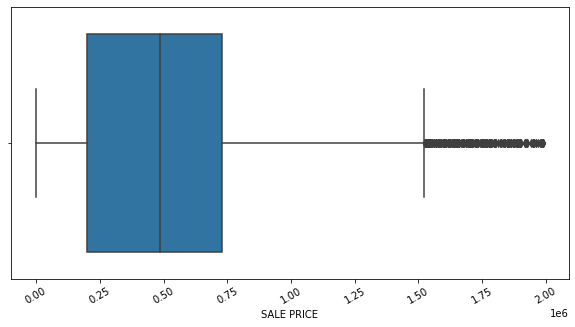

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(df_nyc["SALE PRICE"])
plt.xticks(rotation=30)
plt.show()

## Exploratory Data Analysis

### Measure of  Central Tendency

#### Mean

In [35]:
print("Rata-rata SALE PRICE = ", df_nyc['SALE PRICE'].mean())

Rata-rata SALE PRICE =  505066.0430574227


In [36]:
#kita ingin melihat rata rata penjualan tiap daerah
rata_rata1 = df_nyc.groupby('BOROUGH').mean()
rata_rata1

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,SALE YEAR,SALE DATE
BOROUGH,,,,,,,,,,
BRONX,4210.587169,48.104603,1.872245,0.0,1.872245,2575.021199,2142.870014,3.264804e+05,2016.655230,16.721897
BROOKLYN,5077.599840,43.806007,1.904800,0.0,1.904800,2277.407045,2144.426704,4.682337e+05,2016.639557,16.344277
MANHATTAN,1940.857143,65.114286,2.057143,0.0,2.057143,1603.971429,3061.714286,1.140757e+06,2016.742857,17.514286
QUEENS,7774.670155,43.546751,1.490397,0.0,1.490397,2933.185394,1658.841863,6.346498e+05,2016.647614,16.801150
STATEN ISLAND,3404.673966,58.192484,1.286834,0.0,1.286834,3068.125169,1578.473642,4.673118e+05,2016.630441,16.323871


Dari data diatas kita dapat lihat bahwa rata rata penjualan property daerah yang paling tinggi berada pada daerah Manhattan.

#### Median

In [37]:
print("Median SALE PRICE = ",df_nyc['SALE PRICE'].median())

Median SALE PRICE =  485000.0


In [38]:
median = df_nyc[['BOROUGH','SALE PRICE']].groupby('BOROUGH').median().sort_values(by='SALE PRICE', ascending=True)
median

,SALE PRICE
BOROUGH,
BRONX,375000.0
BROOKLYN,380000.0
STATEN ISLAND,470000.0
QUEENS,610000.0
MANHATTAN,1375000.0


#### Modus

In [39]:
columns = ['BUILDING CLASS CATEGORY', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE']
for col in columns:
    print("Modus "+col+" = ",df_nyc[col].mode()[0])

Modus BUILDING CLASS CATEGORY =  01 ONE FAMILY DWELLINGS                    
Modus BUILDING CLASS AT PRESENT =  A1
Modus BUILDING CLASS AT TIME OF SALE =  A1


### Measure of Spread

#### Range

In [40]:
range1=('Range SALE PRICE = ', (df_nyc['SALE PRICE'].max() - df_nyc['SALE PRICE'].min()))
print(range1)
range2=('Range GROSS SQUARE FEET = ', (df_nyc['GROSS SQUARE FEET'].max() - df_nyc['GROSS SQUARE FEET'].min()))
print(range2)

('Range SALE PRICE = ', 1990000.0)
('Range GROSS SQUARE FEET = ', 4818.0)


#### Variance

In [41]:
var1 = df_nyc.groupby('BOROUGH').var()
var1

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,SALE YEAR,SALE DATE
BOROUGH,,,,,,,,,,
BRONX,8.101843e+05,1643.301834,0.502647,0.0,0.502647,7.919222e+05,601491.093032,6.147563e+10,0.225967,80.011086
BROOKLYN,5.802961e+06,971.515058,0.475567,0.0,0.475567,5.369520e+05,604946.472397,2.605884e+11,0.230547,76.933757
MANHATTAN,7.486324e+04,2322.751261,0.526050,0.0,0.526050,1.027059e+05,586999.386555,4.319107e+11,0.196639,83.257143
QUEENS,1.590243e+07,1252.762681,0.385662,0.0,0.385662,9.671527e+05,342888.764385,9.884625e+10,0.228236,77.245823
STATEN ISLAND,5.173575e+06,2193.712534,0.221922,0.0,0.221922,1.476940e+06,295666.672304,3.469741e+10,0.233048,78.001623


#### Standart Deviation

In [42]:
standart_dev = df_nyc.groupby('BOROUGH').std()
standart_dev

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,SALE YEAR,SALE DATE
BOROUGH,,,,,,,,,,
BRONX,900.102389,40.537659,0.708976,0.0,0.708976,889.900108,775.558568,247942.790091,0.475359,8.944892
BROOKLYN,2408.933511,31.169136,0.689613,0.0,0.689613,732.770072,777.783050,510478.591281,0.480153,8.771189
MANHATTAN,273.611483,48.194930,0.725293,0.0,0.725293,320.477629,766.158852,657199.141646,0.443440,9.124535
QUEENS,3987.784520,35.394388,0.621017,0.0,0.621017,983.439230,585.567045,314398.230886,0.477741,8.788960
STATEN ISLAND,2274.549508,46.837085,0.471086,0.0,0.471086,1215.294181,543.752400,186272.396345,0.482751,8.831853


Dari Data Variance dan Standart Deviasi, **data NYC Sales Property** memiliki distribusi yang besar. Data menunjukkan distribusi harga property condong ke-kanan karena melihat hasil dari mean dan median. Hal ini disebabkan karena mean data lebih besar daripada median data

## Probability Distribution

Kita ingin melihat distribusi peluang dari **land square feet** New York pada tahun 2016 dan 2017

In [43]:
df_sale_price = df_nyc['SALE PRICE']
df_sale_price

0        1375000.0
1        1510000.0
2        1595790.0
3        1000000.0
4        1550000.0
           ...    
26030     610000.0
26031     509000.0
26032     450000.0
26033     550000.0
26034     460000.0
Name: SALE PRICE, Length: 26035, dtype: float64

Text(0, 0.5, 'Frekuensi')

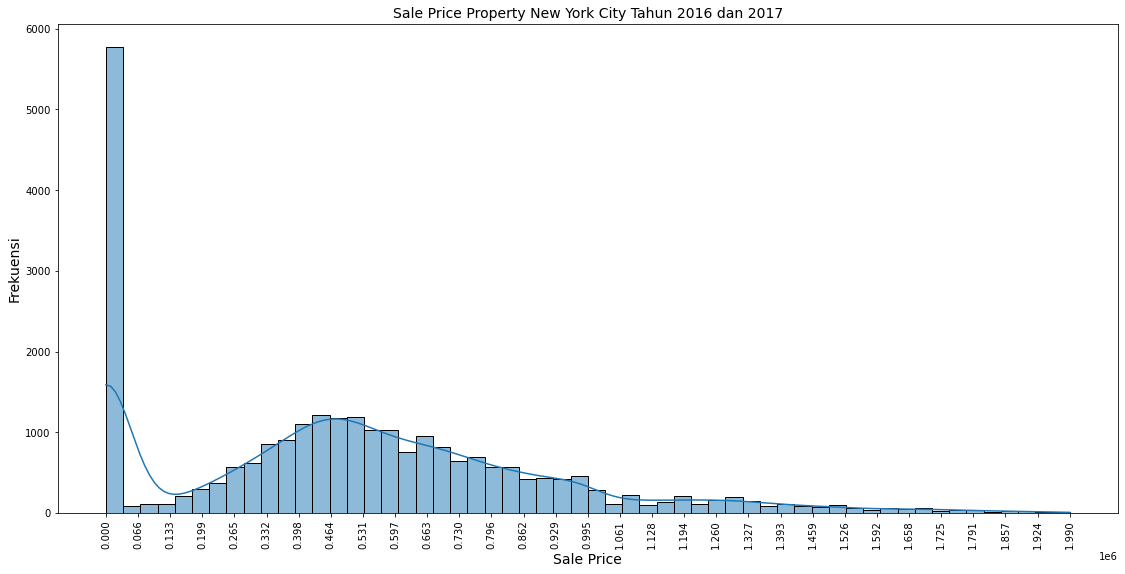

In [44]:
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
count, bin_edge_sale_price=np.histogram(df_sale_price,bins=30)
sns.histplot(df_sale_price,kde=True, ax=ax)
ax.set_title('Sale Price Property New York City Tahun 2016 dan 2017', fontsize=14)
ax.set_xlabel('Sale Price', fontsize=14)
ax.set_xticks(bin_edge_sale_price)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi', fontsize=14)

Dari Histogram diatas, data sale price property NYC belum berdistribusi secara normal. Maka dari itu kita akan gunakan teorema Limit tengah (Central Limit) untuk membuat data tersebut berdistribusi normal

In [45]:
l = 1000 # nilai acak dari sale price
b = 10000 # jumlah sample
sample_mean_sale_price = []
for i in range(b):
    sample_values = np.random.choice(a=df_sale_price,size=l)
    sample_mean_sale_price.append(np.mean(sample_values))


Text(0, 0.5, 'Frekuensi')

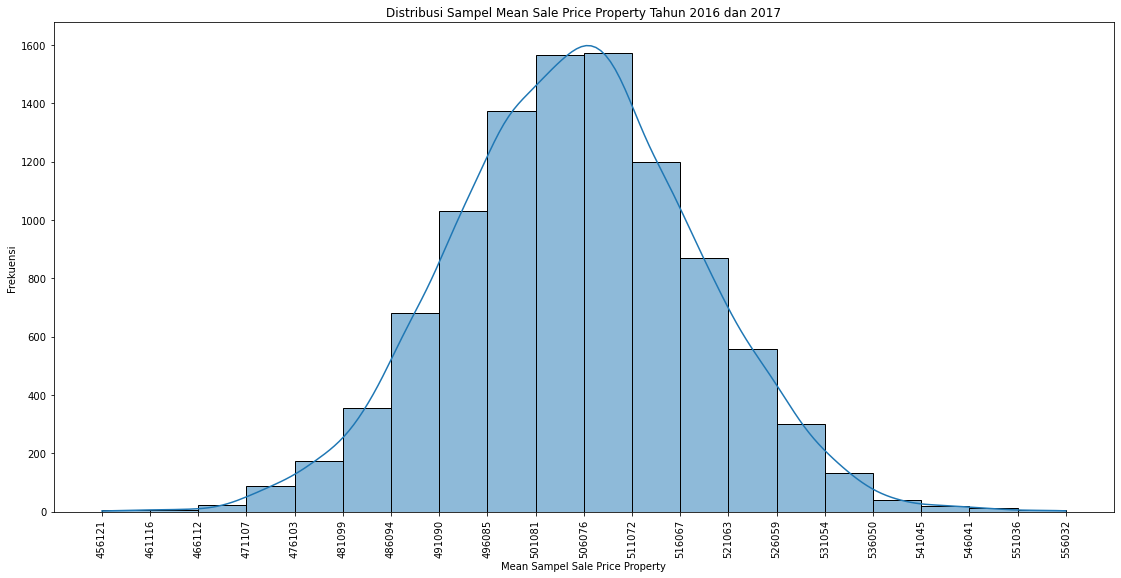

In [46]:
count, bin_edges = np.histogram(sample_mean_sale_price, bins=20)
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
sns.histplot(sample_mean_sale_price,kde=True, bins=20, ax=ax)
ax.set_title('Distribusi Sampel Mean Sale Price Property Tahun 2016 dan 2017')
ax.set_xlabel('Mean Sampel Sale Price Property')
ax.set_xticks(bin_edges)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi')

Hasil dari distribusi peluang sample mean sale price sudah normal

## Confidence Intervals

In [47]:
sm_saleprice_series = pd.Series(sample_mean_sale_price)
# mean
print(sm_saleprice_series.mean())
# median
print(sm_saleprice_series.median())
# sd
print(sm_saleprice_series.std())

505124.38616889983
505216.512
12715.018960202713


In [48]:
sd_df_nyc_sale=df_nyc['SALE PRICE'].std()
mean_sampel_mean = np.mean(sample_mean_sale_price)
std_sampel_mean = np.std(sample_mean_sale_price)
z_scores=1.96

In [49]:
x = len(df_nyc) # banyak data
sd_meansample = sd_df_nyc_sale/np.sqrt(x)

In [50]:
batas_atas = mean_sampel_mean - z_scores*sd_meansample
batas_bawah = mean_sampel_mean + z_scores*sd_meansample
batas_atas,batas_bawah

(500287.88226071856, 509960.89007708145)

Text(0.5, 0, 'Sampel Mean New York Property Sales Price')

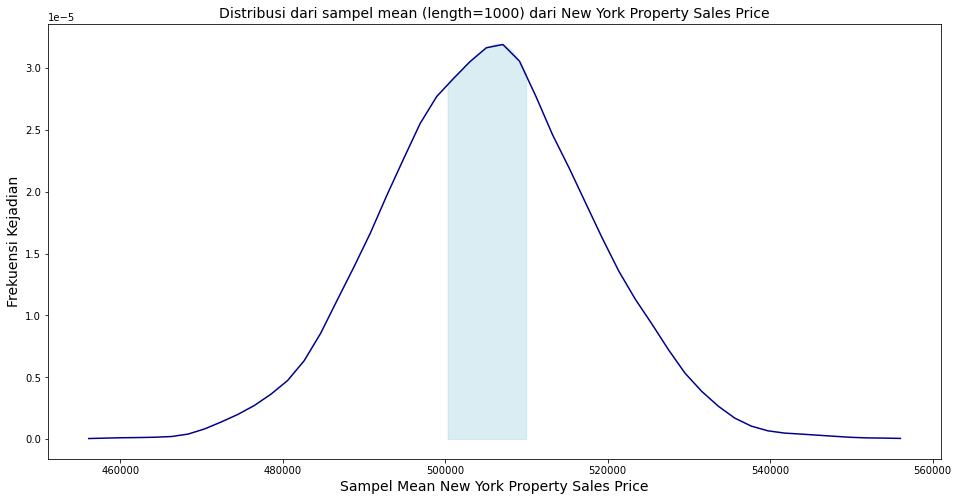

In [51]:
plt.figure(figsize=(16,8))
kde = scistats.gaussian_kde(sample_mean_sale_price)
pos = np.linspace(np.min(sample_mean_sale_price), np.max(sample_mean_sale_price))
plt.plot(pos,kde(pos), color='darkblue')
shade = np.linspace(batas_bawah,batas_atas)
plt.fill_between(shade,kde(shade),alpha=0.45,color='lightblue')
plt.title('Distribusi dari sampel mean (length='+str(l)+') dari New York Property Sales Price', fontsize=14)
plt.ylabel('Frekuensi Kejadian', fontsize=14)
plt.xlabel('Sampel Mean New York Property Sales Price',fontsize=14)

Dari grafik distribusi diatas didapatkan bahwa distribusi dari harga jual property New York tahun 2016-2017 berada pada kisaran 500287.88226071856 sampai 509960.89007708145

## Hypotesis Testing

Kita ingin menguji hipotesis kita dalam kasus Apakah Penjualan pada daerah Staten Island lebih tinggi daripada daerah Queens pada tahun 2016 sampai 2017 ?

Kita akan membuat nulls dan alternatif hipotesis terlebih dahulu:

    H0 : Penjualan property Staten Island >= penjualan property Queens 
    H1 : Penjualan property Staten Island < penjualan property Queens


In [52]:
staten_island = df_nyc[df_nyc['BOROUGH'] == 'STATEN ISLAND']
queens = df_nyc[df_nyc['BOROUGH'] == 'QUEENS']

In [53]:
mean_statenisland = df_nyc[df_nyc['BOROUGH'] == 'STATEN ISLAND']['SALE PRICE'].mean()
mean_queens = df_nyc[df_nyc['BOROUGH'] == 'QUEENS']['SALE PRICE'].mean()
print(mean_statenisland)
print(mean_queens)

467311.8080562314
634649.7530764807


In [54]:
sm.stats.ztest(staten_island["SALE PRICE"], queens["SALE PRICE"],alternative='two-sided')

(-30.19452171558614, 2.795195561089792e-200)

Dari hasil test didapat bahwa p-value bernilai 2.79.10e-200. Sehingga bisa ditarik kesimpulan bahwa H0 ditolak dan H1 diterima. Artinya Penjualan property di Staten Island tidak lebih signifikan daripada penjualan property di Queens

## Conclusion

Dari analisis yang telah dilakukan, didapatkan kesimpulan sebagai berikut 

1. Dalam confidence intervals 95% didapat bahwa rata rata harga jual property New York tahun 2016-2017 berada pada kisaran dalam 500287.88226071856 sampai 509960.89007708145
2. Penjualan property pada daerah Staten Island tidak lebih signifikan daripada penjualan property pada daerah Queens berdasarkan hasil uji hipotesis